In [1]:
# LDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Veri Seti
url='https://raw.githubusercontent.com/cagriemreakin/Machine-Learning/master/4%20-%20Dimensionality%20Reduction/2%20-%20Linear%20Discriminant%20Analysis/Wine.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Boyut Sayısı
size=X.shape[1]

In [3]:
# Eğitim ve Test Set Görselleştirme için Kullanılacak
def visualize(X,y,title):
    from matplotlib.colors import ListedColormap
    plt.figure(figsize=(12,7))
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression ' + title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()


In [4]:
# Eğitim ve Test Setine Ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
#Component sayısına karar verebilmek için n_components' a parametre olarak None değerini atıyoruz.
#Böylece veri setimizdeki explained variance ve cumulative variance değerlerini bulup grafikte gösteriyoruz.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [7]:
# Logistic Regression Modeli ile Veri Setini Eğitme
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Sonuçların Tahmini
y_pred = classifier.predict(X_test)


In [9]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

In [10]:
print("\n Confusion Matrix for 2 Component\n",cm1)


 Confusion Matrix for 2 Component
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [11]:
from sklearn.metrics import accuracy_score
print("n_components = 2 -> Prediciton: %",accuracy_score(y_pred,y_test)*100)

n_components = 2 -> Prediciton: % 100.0


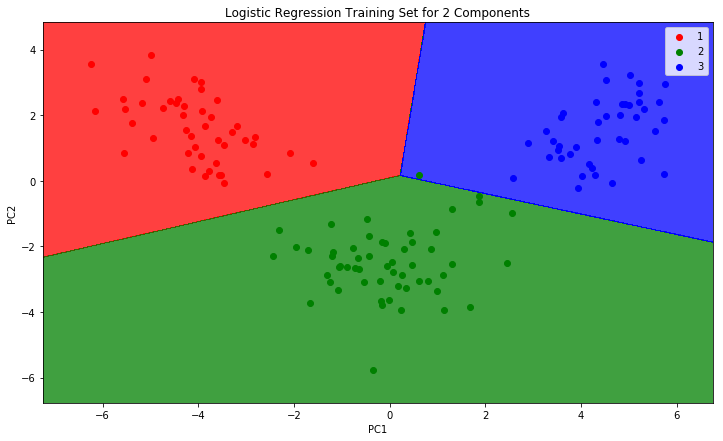

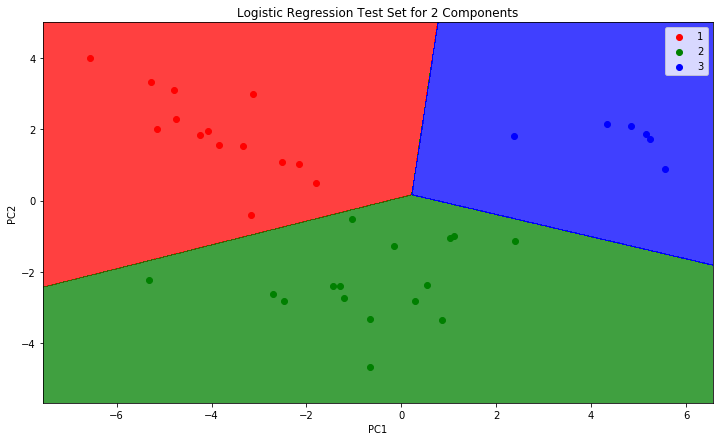

In [12]:
visualize(X_train,y_train,'Training Set for 2 Components')
visualize(X_test,y_test,'Test Set for 2 Components')